## Plotting data

To create plots we need to import the matplotlib library, specifically the [pyplot module](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html). Matplotlib is probably the most famous and flexible pythons library for data visulaization.  Pandas provides many different [visualization options](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#). There are always many, many ways to produce plots and manipulate the elements in the plots, so you can achieve the same results using a wide variety of techniques and options.  

In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


We are going to import seaborn, too, to explore using it as well.

In [2]:
import seaborn as sns

Let's import the boards thickness dataset, and drop the column about the date and time for now.  

In [8]:
all_boards = pd.read_csv('six-point-board-thickness.csv')
all_boards_no_time = all_boards.drop(columns=["Date.Time"])
print(all_boards_no_time)

      Pos1  Pos2  Pos3  Pos4  Pos5  Pos6
0     1761  1739  1758  1677  1684  1692
1     1801  1688  1753  1741  1692  1675
2     1697  1682  1663  1671  1685  1651
3     1679  1712  1672  1703  1683  1674
4     1699  1688  1699  1678  1688  1705
...    ...   ...   ...   ...   ...   ...
4995  1690  1701  1690  1694  1735  1695
4996  1703  1674  1666  1694  1659  1728
4997  1657  1667  1675  1654  1648  1609
4998  1746  1717  1638  1723  1703  1706
4999  1668  1680  1668  1669  1651  1629

[5000 rows x 6 columns]


# Bar Plots
For labeled, non-time series data, you may want to produce a **bar plot.**  Rember a bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the values that they represent.  The bar plot shows comparisons (often a summary measure of numerical values, such as the mean) among discrete categories.  One aixs of the plot shows the specific categories being compared and the other axis represents the measured value.  

Let's use the dataframe to make a bar plot of the averages of each of the columns using the boards dataframe.  Since we are working with a dataframe, we will use the .bar function to use a pandas datafrane [dataframe.plot.bar()](pandas.psdata.org/docs/reference/api/pandas.Dataframe.plot.bar.html) which uses matlabplot.  

In [9]:
# Calucalte the mean for all columns
mean = all_boards_no_time.mean()
print(mean)

Pos1    1689.3934
Pos2    1680.9126
Pos3    1678.2108
Pos4    1687.3510
Pos5    1682.8952
Pos6    1681.5778
dtype: float64


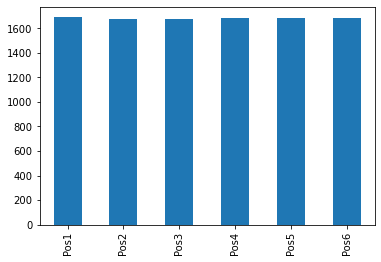

In [10]:
# Create the bar plot
barplotA = mean.plot.bar()
plt.show()

The plot has been created but it doesn't look great. Let's play with some of the plot setting.

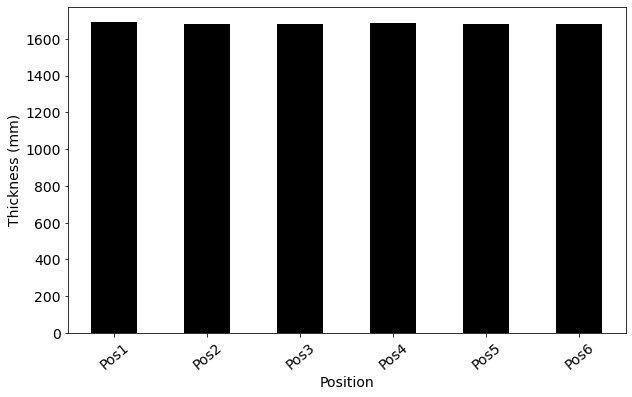

In [11]:
barplotA = mean.plot.bar(figsize=(10,6),fontsize=14,color='black',rot=40)
plt.xlabel("Position", size=14)
plt.ylabel("Thickness (mm)", size=14)
plt.show()

Plots can also be created using chained commands.

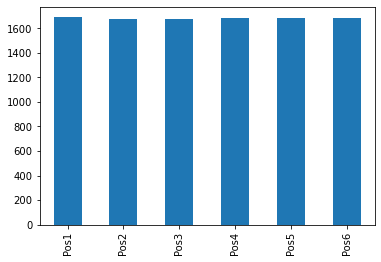

In [12]:
barplotB = all_boards_no_time.mean().plot.bar()
plt.show()

Lastly the axis option can be used in many scenarios to change which axis in the dataframe is being operated on. Usually the default axis=0, meaning that the method will operate on the rows (in the bar plot above, the average is computed by summing up the rows for each column). By specifying axis=1 the columns will be the axis of operation (the average is computed by summing up the columns for all rows). We'll show an example using a line plot. The line plot will have 5000 values on the x-axis (one for each row in the dataframe).  See the documnetation for more information (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.htmlhttps://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

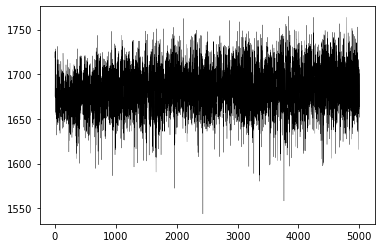

In [13]:
PlotWithAxis1 = all_boards_no_time.mean(axis=1).plot(color='black', linewidth=0.25)
plt.show()

Now let's look at [Seaborn](https://seaborn.pydata.org/), another great data visualization package for python. One reason to try out Seaborn is that it can sometimes make visualizing data a bit easier, and works with dataframes easily.  Here, it creates the mean smmary by deafult from the dataframe.    

Text(0.5, 1.0, 'Boards Thickness by Position')

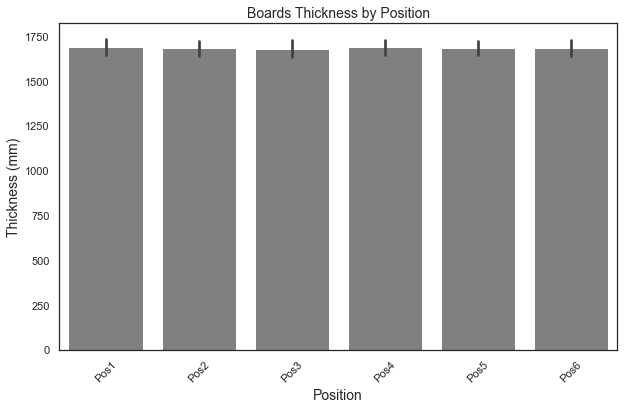

In [27]:
# First let's create a barplot.  Note the standard deviation added.
sns.set(rc = {'figure.figsize':(10,6)})
sns.set_style("white")
barplotC = sns.barplot(data=all_boards_no_time, color="gray", ci='sd')
barplotC.set_xticklabels(barplotC.get_xticklabels(), rotation=45)
barplotC.set_xlabel("Position", size=14)
barplotC.set_ylabel("Thickness (mm)", size=14)
barplotC.set_title("Boards Thickness by Position", size=14)

In [29]:
all_boards_no_time.describe()

,Pos1,Pos2,Pos3,Pos4,Pos5,Pos6
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1689.393400,1680.912600,1678.210800,1687.351000,1682.895200,1681.577800
std,43.838524,41.367021,47.637345,42.425716,40.115778,45.071714
min,880.000000,1333.000000,1268.000000,1252.000000,1311.000000,1282.000000
25%,1670.000000,1662.000000,1657.750000,1666.000000,1663.000000,1659.000000
50%,1685.000000,1677.000000,1677.000000,1683.000000,1679.000000,1679.000000
75%,1705.000000,1695.000000,1697.250000,1708.000000,1697.250000,1702.000000
max,1902.000000,1838.000000,1840.000000,1852.000000,1862.000000,1865.000000


# Boxplots

Now let's create a boxplot of the dataframe.  A boxplot summarizes the distribution of a numerical variable for one or more groups.  It quickly provides a visual overview of the median, quartiles, and outliers of a dataset. We will use the dataframe.boxplot() function.

First, let's plot with matplotlib with [.boxplot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) 

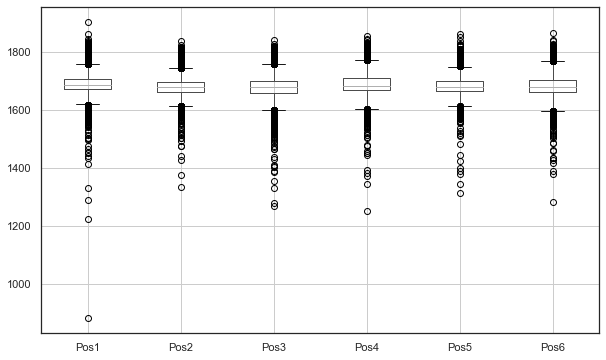

In [16]:
boxplotA = all_boards_no_time.boxplot()
plt.show()

To see the keys for the boxplots, you can ask for the resulting varibale for boxplotB to be a Python dictionary, using return_type='dict'.

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

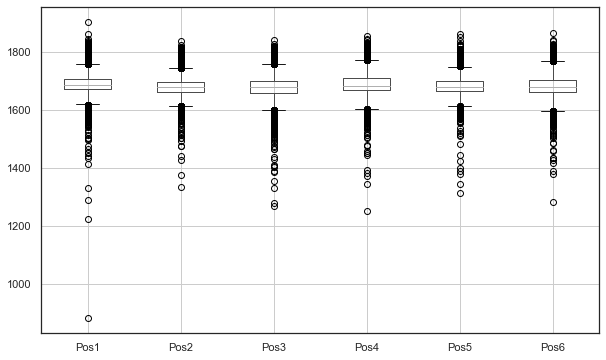

In [17]:
boxplotAA = all_boards_no_time.boxplot(return_type='dict')
type(boxplotAA)
boxplotAA.keys()

Let's improve some of the visualization with the plot settings now using the ...props keyword argument.

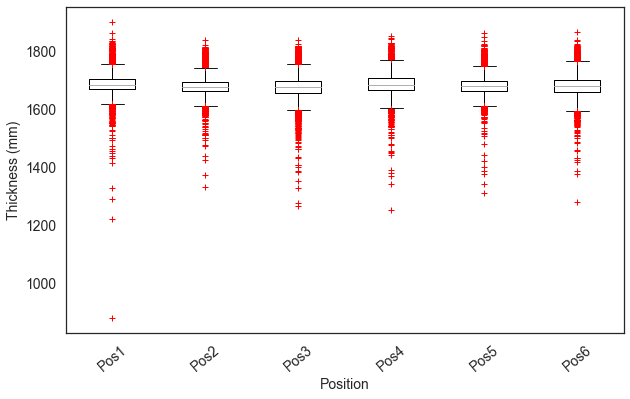

In [18]:
# Specifiy the figure size, make the font larger, remove the grid lines
# change the box plot colours to all black and the outliers to red +s
boxplotB = all_boards_no_time.boxplot(figsize=(10,6),fontsize=14,grid=False, rot=40,return_type='dict')
plt.xlabel("Position", size=14)
plt.ylabel("Thickness (mm)", size=14)
plt.setp(boxplotB['boxes'], color='black')
plt.setp(boxplotB['whiskers'], color='black')
plt.setp(boxplotB['fliers'], markeredgecolor='red', marker='+')
plt.show()

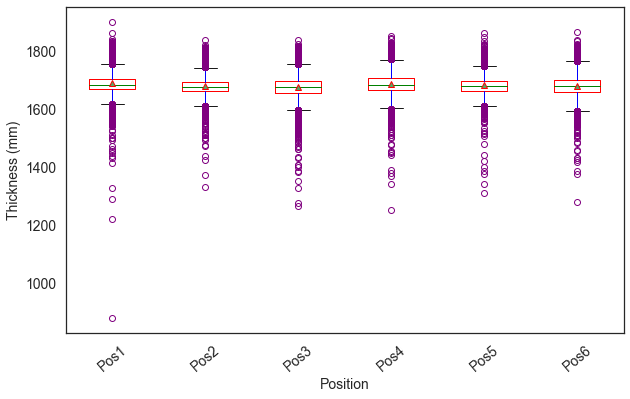

In [19]:
# Or use the parameters for the .boxplot (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
boxplotC = all_boards_no_time.boxplot(figsize=(10,6),fontsize=14,grid=False, rot=40, showmeans=True,
                              meanprops=dict(markeredgecolor='red'),
                              boxprops=dict(color='red'),
                              medianprops=dict(color='green'),
                              whiskerprops=dict(color='blue'),
                              flierprops=dict(markeredgecolor='purple'))
plt.xlabel("Position", size=14)
plt.ylabel("Thickness (mm)", size=14)
plt.show()

Now let's plot wth [seaborn boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

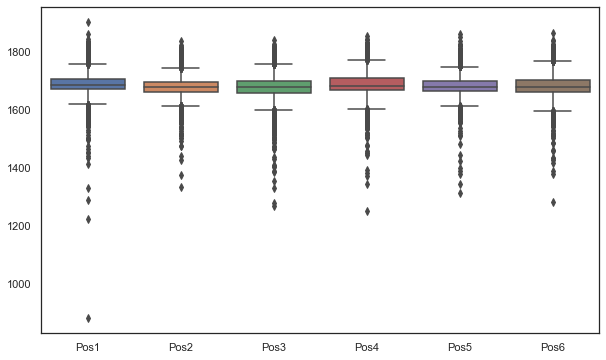

In [20]:
boxplotD = sns.boxplot(data=all_boards_no_time)

The boxes made using sns.boxplot are matplotlib.patches.PathPatch objects (https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.PathPatch.html) . These are stored in .artists as a list, and can be manipulated fairly easily.

In [21]:
type(boxplotD.artists)

list

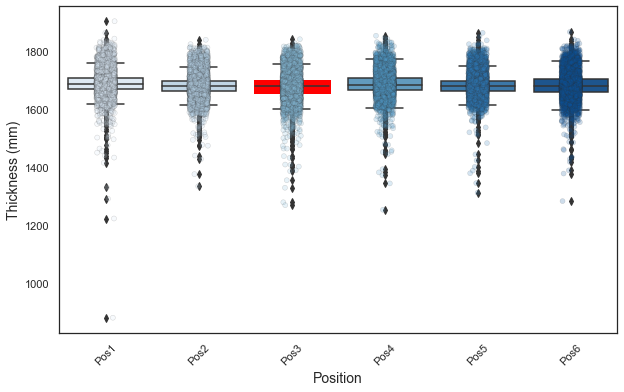

In [22]:
# Set the palette colors, add a stipplot to show the raw data dsitribution.
sns.set_palette(sns.color_palette("Blues"))
boxplotD = sns.boxplot(data=all_boards_no_time)
boxplotD.set_xticklabels(boxplotD.get_xticklabels(), rotation=45)
plt.xlabel("Position", size=14)
plt.ylabel("Thickness (mm)", size=14)
sns.stripplot(data=all_boards_no_time,
              alpha=0.2, jitter=True, dodge=True, linewidth=0.5)
# Select which box you want to change to work with individual elements in the plot
mybox = boxplotD.artists[2]
# Change the appearance of that box
mybox.set_facecolor('red')
mybox.set_edgecolor('red')
mybox.set_linewidth(3)
plt.show()

Let's look at using a seaborn [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) and draw a combination of boxplot and an estimation of the underlig distribution. 

Text(0, 0.5, 'Thickness (mm)')

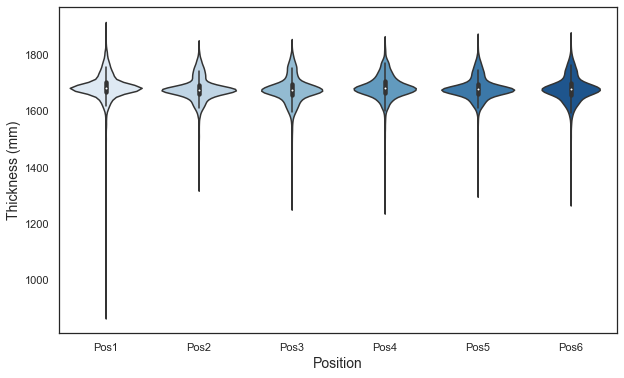

In [24]:
violinplotA = sns.violinplot(data=all_boards_no_time)
plt.xlabel("Position", size=14)
plt.ylabel("Thickness (mm)", size=14)

We will not cover an example of every plot. The general syntax for the different plots is often similar within a library. Please check the documentation of the specific plot you want to make to learn about the different plot options. Additionally, these libraries are so widely used that you can typically find the answer to your questions by googling them.